# EDA & Classification on Google Play Store Apps

This data can be downloaded on https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6.
There are total 13 attributes in this data:
    1. App: Application name
    2. Category: Category the app belongs to
    3. Rating: Overall user rating of the app (as when scraped)
    4. Reviews: Number of user reviews for the app (as when scraped)
    5. Size: Size of the app (as when scraped)
    6. Installs: Number of user downloads/installs for the app (as when scraped)
    7. Type: Paid or Free
    8. Price: Price of the app (as when scraped)
    9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
    10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical                 family game will belong to Music, Game, Family genres.
    11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
    12. Current Ver: Current version of the app available on Play Store (as when scraped)
    13. Android Ver: Min required Android version (as when scraped)

In this project, I will do the following steps:
    1. Data exploration
    2. Check the relationship between Rating and other contributions
    3. Impute missing values
    4. Classification : Random Forest and Logistic Regression

In [61]:
#import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
%matplotlib inline

In [62]:
#import other packages
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
#Upload data
data=pd.read_csv('googleplaystore.csv')
df=pd.DataFrame(data)

In [64]:
#EDA
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From the information table, all types of variables are objects expect Rating. I need to transform the data type later in order to fit the models. In addition, it is clearly that missing values exist in Rating, Type Content Rating, Current Ver and Android ver. Let see how many missing values exist in each variable:

In [66]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Since there are less than 10 missing values in the Type, Content Rating, Current Ver and Android Ver. I will drop them. For Rating, I will use the median to fill the missing values. But, let me see if any unnormal datas in the each variable first.

In [67]:
#Look for each variable
#APP
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [68]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
ESPN                                                  7
Temple Run 2                                          6
Bubble Shooter                                        6
Zombie Catchers                                       6
Nick                                                  6
Subway Surfers                                        6
slither.io                                            6
Bowmasters                                            6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bleacher Report: sports news, scores, & highlights    6
TripAdvisor Hotels Flights Restaurants Attractions    5
Skyscanner                                      

It is obvious that a lot of duplicates in the data. 

In [69]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


It showed that the only difference is Reviews or Category. So, I will delete those duplicates.

In [70]:
df.drop_duplicates(subset='App',inplace=True)
df.shape

(9660, 13)

So, the rows changes from 10841 to 9660. There are 9660 unique Apps.

In [71]:
#Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' looks unnormal in the Category, so I need to find the information and see how it is.

In [72]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Rating here is 19 which looks weired. Also, it showed NaN in the Content Rating and Android Ver. So delete this row.

In [73]:
df.drop(index=10472,inplace=True)

In [74]:
df.shape

(9659, 13)

In [75]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Looks good! But there are NaN in it, I will impute it later.

In [76]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [77]:
#Change the dtype into int.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN

In [78]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [79]:
#Replace M and K, and keep "Varies with device".
df['Size']=df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k','e-3'))

In [80]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [81]:
#Remove ',' and '+', and transform the type into int
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',',''))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [82]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [83]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [84]:
#Remove '$'and transform the type into int
df['Price']=df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [85]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [86]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [87]:
df['Last Updated'].unique()
#Change to datetime format
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [88]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [89]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              9659 non-null object
Installs          9659 non-null int64
Type              9658 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null datetime64[ns]
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


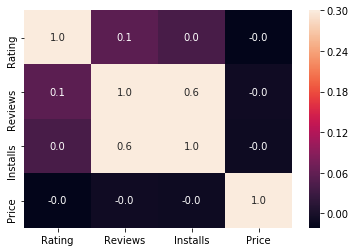

In [91]:
#Relationship between Rating and other numeric variables (Review, Installs and Price)
sns.heatmap(df.corr(),annot=True,fmt='.1f',vmax=.3)

It showed that Installs correlated with Reviews. That's make sense since more people download the app, more people will give the reviews. But others variable looks has no correlations.

In [92]:
df['Rating'].iplot(kind='hist')

It looks most rating is higher than 4.1. Usually it is around 4.5.

In [93]:
#Relationship between Rating and Category variables
df['Category'].iplot(kind='hist')

Family was the biggest group in the Category. Game is the second and Tools is the third.

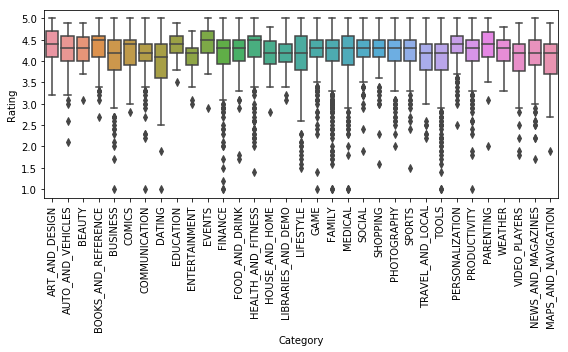

In [94]:
# Relationship between Rating and Category
plt.figure(figsize=(8,5))
g=sns.boxplot(x='Category',y='Rating',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

It obvious some outliers in each Category. Also, almost all Category has similar Rating.Category looks has less effect on Rating.

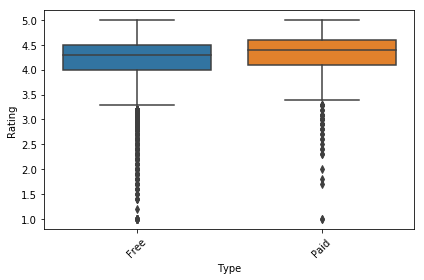

In [95]:
# Relationship between Rating and Type
#plt.figure(figsize=(8,5))
df['Type'].iplot(kind='hist')
g=sns.boxplot(x='Type',y='Rating',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.tight_layout()

Marioty Type are Free. But, the average Rating of Paid looks a litte bit higher than the Rating of Free. Also, the range of Paid Rating is smaller than the Free one. So, I guess the Type has a little effect on the Rating. The paid App maybe better than the Free one.

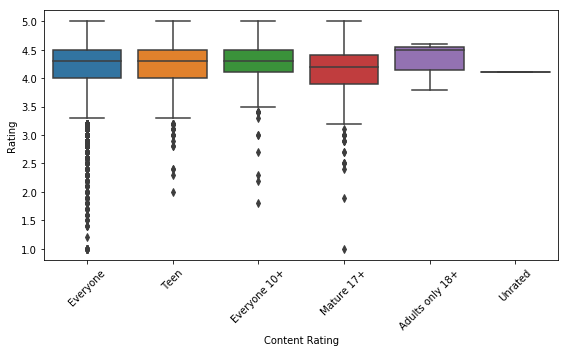

In [96]:
#Relationship between Rating and Content Rating
df['Content Rating'].iplot(kind='hist')
plt.figure(figsize=(8,5))
g=sns.boxplot(x='Content Rating',y='Rating',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.tight_layout()

Mariorty age group is everyone. What is interesting is that even 'Adults only 18+' didn't have many people, this age group gave the highest average Rating. Also, the Rating range of the 'Adults only 18+' is the smallest. Others looks similar. 'Mature 17+' got the lowest average Rating. So, maybe the Content Rating has a little effect on Rating.

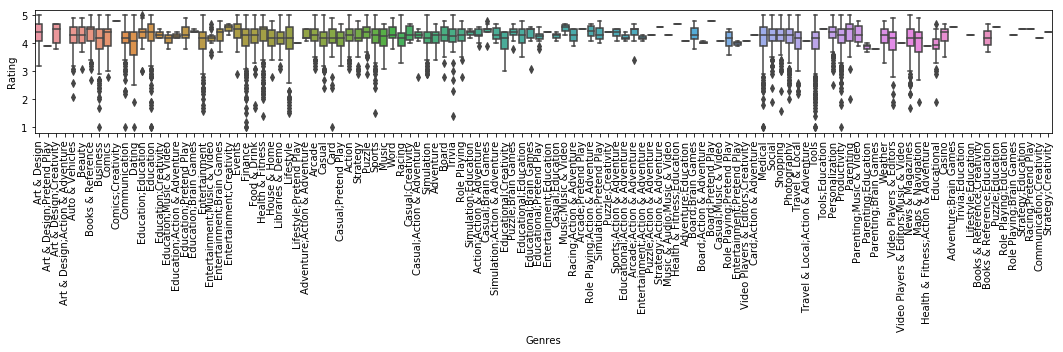

In [97]:
#Relationship between Rating and Genres
df['Genres'].iplot(kind='hist')
plt.figure(figsize=(15,5))
g=sns.boxplot(x='Genres',y='Rating',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

Tools was the biggest group in Geners. Next is enternatiment and education. From the boxplot, I think Genres doesn't effect too much on the Rating. Almost each group looks similar on the Rating.

In [98]:
#Relationship between Rating and Last Updated
df['Last Updated'].iplot(kind='hist')

It is obvious that june 26,2018 updated the most App. Next is July 11,2018 and Auguest 6,2018.

In [99]:
# Creat a new DataFrame which only include Rating and last Updated
new_df=df[['Rating','Last Updated']]
# Get the year from each date
new_df['year']=new_df['Last Updated'].dt.year
new_df.head()

,Rating,Last Updated,year
0,4.1,2018-01-07,2018
1,3.9,2018-01-15,2018
2,4.7,2018-08-01,2018
3,4.5,2018-06-08,2018
4,4.3,2018-06-20,2018


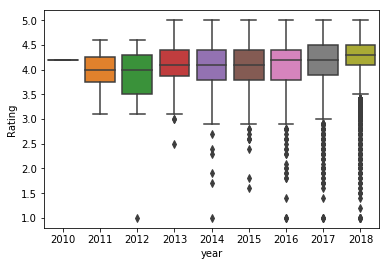

In [100]:
# Relationship between Rating and Year in Last Updated
new_df['year'].iplot(kind='hist')
sns.boxplot(x='year',y='Rating',data=new_df)

Maoirty App were Last Updated in 2018. Also in the 2018, the average Rating is the highest one. This maks sense because higher rating will keep the app longer. But, Last Updated looks has almost no effect on Rating.

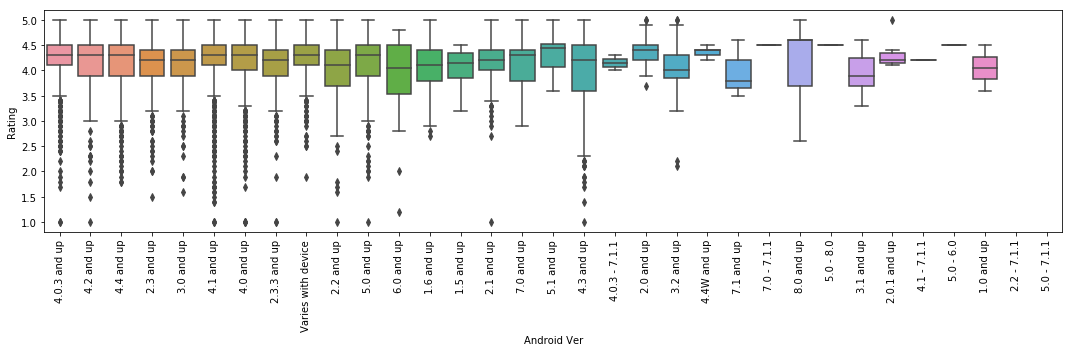

In [101]:
#Relationship between Rating and Android Ver
df['Android Ver'].iplot(kind='hist')
plt.figure(figsize=(15,5))
g=sns.boxplot(x='Android Ver',y='Rating',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

Maiorty Android Ver is 4.1 and up.Next is 4.0.3 and up and 4.0 and up. From the boxplot, I think the Android Ver has no effect on Rating.

In [102]:
#Date Cleaning and preprocessing
#Since Last Updated, Current Ver and Android Ver has no effect on Rating. So, I delete these three variables.
df=df.drop(columns=['Last Updated','Current Ver','Android Ver'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [103]:
#handle missing values
#check missing values
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [104]:
#Drop missing values in the Type.
df.dropna(subset=['Type'],inplace=True)

#Use median to fill the missing values in the Rating
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [105]:
# Encoding: APP and Genres
en= preprocessing.LabelEncoder()
df['App']=en.fit_transform(df['App'])
df['Genres']=en.fit_transform(df['Genres'])

In [106]:
# Encoding: Category, Type, and Content Rating
df['Category']=pd.get_dummies(df['Category'])
df['Type']=pd.get_dummies(df['Type'])
df['Content Rating']=pd.get_dummies(df['Content Rating'])

In [107]:
#Calculate the median of Size without "Varies with device"
df[df['Size']!="Varies with device"].Size.median()

12.0

In [108]:
# Use median to replae "Varise with device", and change type of "Size" into numeric
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device','12'))
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [109]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6961,1,4.1,159,19.0,10000,1,0.0,0,9
1,2632,1,3.9,967,14.0,500000,1,0.0,0,12
2,8655,1,4.7,87510,8.7,5000000,1,0.0,0,9
3,7826,1,4.5,215644,25.0,50000000,1,0.0,0,9
4,7021,1,4.3,967,2.8,100000,1,0.0,0,11


In [110]:
# Creat a function to set two different targets
def separate(x):
    if x>3.5:
        return "High Rating"
    else:
        return "Low Rating"
df['Rating']=df['Rating'].apply(lambda x: separate(x))

In [111]:
#Classification
#split train and test date
trainX, testX, trainLabel, testLabel = train_test_split(df.drop(columns=['Rating']),df['Rating'],test_size = 0.2,random_state=42)

In [112]:
#Random Forest
RF=RandomForestClassifier(random_state=42).fit(trainX,trainLabel)
RF_pred=RF.predict(testX)
RF_accuracy=accuracy_score(testLabel,RF_pred)
print(RF_accuracy)
print(classification_report(testLabel,RF_pred))

0.9047619047619048
             precision    recall  f1-score   support

High Rating       0.91      0.99      0.95      1761
 Low Rating       0.26      0.04      0.07       171

avg / total       0.86      0.90      0.87      1932



In [113]:
# Logistic regression
lg = LogisticRegression().fit(trainX, trainLabel)
lg_pred=lg.predict(testX)
lg_accuracy=accuracy_score(testLabel,lg_pred)
print(lg_accuracy)
print(classification_report(testLabel,lg_pred))

0.9114906832298136
             precision    recall  f1-score   support

High Rating       0.91      1.00      0.95      1761
 Low Rating       0.00      0.00      0.00       171

avg / total       0.83      0.91      0.87      1932



C:\Users\candy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Both methods reached more than 90% accuracy. It's great. However, from the report table, I noticed that both methods are not suit to predict the low rating. Maybe need other methods to compare in the future.